In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from geomloss import SamplesLoss

# Set random seed for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Parameters for the beta distributions
alpha1, beta1 = 2.0, 5.0  # Parameters for source beta distribution
alpha2, beta2 = 5.0, 2.0  # Parameters for target beta distribution

# Number of samples
n_samples = 1000

# Sample from the beta distributions
source_samples = np.random.beta(alpha1, beta1, size=n_samples)
target_samples = np.random.beta(alpha2, beta2, size=n_samples)

# Convert samples to PyTorch tensors
x = torch.from_numpy(source_samples).double().view(-1, 1)
y = torch.from_numpy(target_samples).double().view(-1, 1)

# Define the Sinkhorn divergence using the SamplesLoss function
loss = SamplesLoss("sinkhorn", p=2, blur=0.01)

# Compute the Sinkhorn divergence (approximate Wasserstein distance)
emd = loss(x, y).item()

print(f"Approximate Wasserstein distance (Sinkhorn divergence): {emd:.4f}")

# Visualize the distributions and the transport plan
plt.figure(figsize=(12, 5))

# Plot the source and target distributions
plt.subplot(1, 2, 1)
plt.hist(source_samples, bins=50, alpha=0.5, label='Source Distribution', density=True)
plt.hist(target_samples, bins=50, alpha=0.5, label='Target Distribution', density=True)
plt.legend()
plt.title('Beta Distributions')

# Scatter plot of sorted samples to visualize the transport map
plt.subplot(1, 2, 2)
plt.plot(np.sort(source_samples), np.sort(target_samples), 'o', alpha=0.5)
plt.xlabel('Source Samples (sorted)')
plt.ylabel('Target Samples (sorted)')
plt.title('Optimal Transport Map')
plt.tight_layout()
plt.show()


Wasserstein-2 Distance: 0.4274


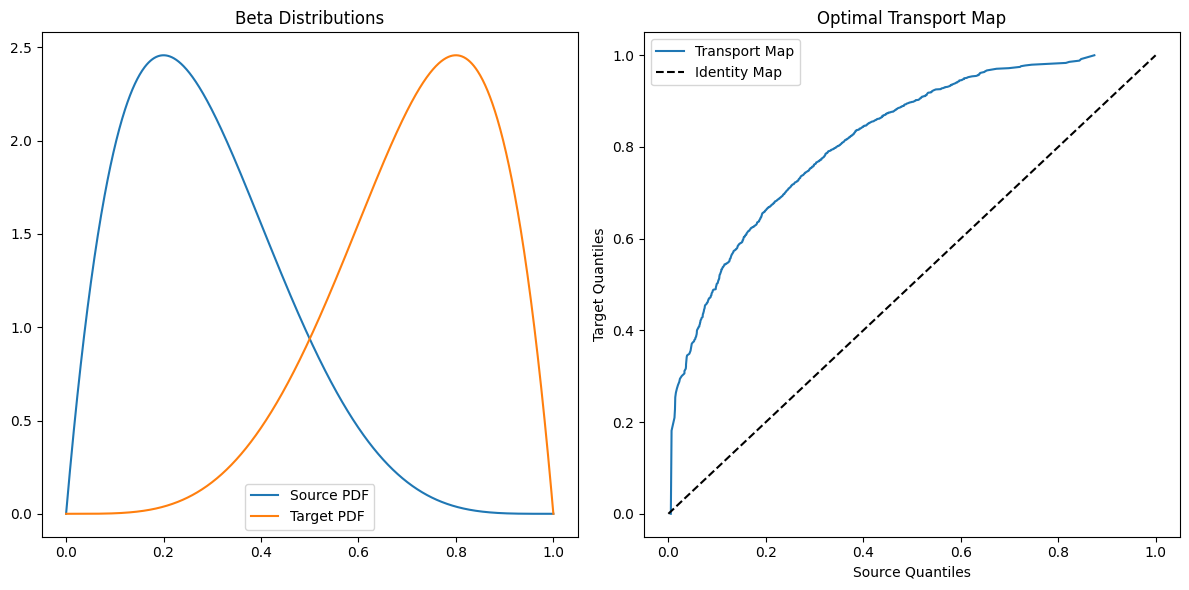

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define source and target Beta distributions
alpha1, beta1 = 2.0, 5.0  # Parameters for the source Beta distribution
alpha2, beta2 = 5.0, 2.0  # Parameters for the target Beta distribution

# Number of samples
n_samples = 1000

# Generate samples from the source distribution
x = beta.rvs(alpha1, beta1, size=n_samples)

# Compute the empirical CDF of the source samples
x_sorted, _ = torch.sort(torch.tensor(x))
cdf_source = torch.linspace(0, 1, steps=n_samples)

# Numerically invert the target CDF
# Since we cannot compute the inverse CDF analytically, we use the percent point function (ppf)
quantiles = beta.ppf(cdf_source.numpy(), alpha2, beta2)
T_x = torch.tensor(quantiles)

# Compute the transport map
transport_map = T_x

# Compute the Wasserstein distance
wasserstein_distance = torch.sqrt(torch.mean((x_sorted - transport_map) ** 2))

print(f"Wasserstein-2 Distance: {wasserstein_distance.item():.4f}")

# Visualization
plt.figure(figsize=(12, 6))

# Plot the source and target PDFs
x_vals = torch.linspace(0, 1, 1000)
pdf_source = beta.pdf(x_vals.numpy(), alpha1, beta1)
pdf_target = beta.pdf(x_vals.numpy(), alpha2, beta2)

plt.subplot(1, 2, 1)
plt.plot(x_vals, pdf_source, label='Source PDF')
plt.plot(x_vals, pdf_target, label='Target PDF')
plt.title('Beta Distributions')
plt.legend()

# Plot the transport map
plt.subplot(1, 2, 2)
plt.plot(x_sorted, transport_map, label='Transport Map')
plt.plot([0, 1], [0, 1], 'k--', label='Identity Map')
plt.title('Optimal Transport Map')
plt.xlabel('Source Quantiles')
plt.ylabel('Target Quantiles')
plt.legend()

plt.tight_layout()
plt.show()
